In [176]:
class argsclass():
    pass
args = argsclass()

In [196]:
import sys
sys.path.append('..')
sys.path.append('../..')
import logging
import torch
import os
import matplotlib.pyplot as plt
from models.ConvLSTM import get_convlstm_model, test_convlstm
from utils.arg_extract import get_args_test
from utils.Scorekeeper import Scorekeeper
from utils.experiment_setup import ExperimentSetup, get_normalizer, load_datasets, create_dataloaders, get_device, load_metadata, load_network, get_transforms
plt.ioff()

logging.basicConfig(format='%(message)s', level=logging.INFO)

# args = get_args_test()
args.experiment_name='ConvLSTM_batch6_samples10_epoch12' 
args.num_workers = 1
args.batch_size=6
args.normalizer_type='normal'
args.test_starting_point=15
args.show_plots=True
args.debug=True

setup = ExperimentSetup(args.experiment_name)
metadata = load_metadata(setup.files['metadata'])
# print(metadata)
# get normalizer from metadata
normalizer = get_normalizer(args.normalizer_type)
# TODO make this load_dataloaders
datasets = load_datasets(setup.files['datasets'])
datasets['Testing data'].root_dir = setup.dirs['data']
datasets['Testing data'].transform = get_transforms(normalizer)['Test']
data_loaders = create_dataloaders(datasets, args.batch_size, args.num_workers)
# up to here
device = get_device()

model = get_convlstm_model(metadata['args'].num_input_frames, metadata['args'].num_output_frames, args.batch_size, device)
model = load_network(model, setup.files['model'])
model.to(device)

score_keeper = Scorekeeper(setup.dirs['charts'], normalizer)

logging.info("Start testing")
# with torch.no_grad():
#     test_convlstm(model, data_loaders['test'], args.test_starting_point, device, score_keeper, setup.dirs['predictions'], args.show_plots, debug=args.debug, normalize=normalizer)
# score_keeper.plot(args.show_plots)

Experiment ConvLSTM_batch6_samples10_epoch12
Creating directories
Loading datasets
use CPU
Start testing


In [205]:
dataloader= data_loaders['test'] 
starting_point = args.test_starting_point
figures_dir = setup.dirs['predictions']
normalize=normalizer
show_plots=True

In [249]:
import random
from utils.plotting import plot_cutthrough, plot_predictions
from utils.Scorekeeper import Scorekeeper
score_keeper = Scorekeeper(setup.dirs['charts'], normalizer)

with torch.no_grad():
    model.eval()
    num_input_frames = model.get_num_input_frames()
    num_output_frames = model.get_num_output_frames()

    for batch_num, batch_images in enumerate(dataloader):
        print('batch ', batch_num)
        batch_size = batch_images.size(0)
        image_to_plot = random.randint(0, batch_size - 1)

        # total_frames = batch_images.size()[1]
        # num_future_frames = total_frames - (starting_point + num_input_frames)

        input_frames = batch_images[:, starting_point:(starting_point + num_input_frames), :, :].clone()
        output_frames = model.forward(input_frames)
        input_end_point = starting_point + num_input_frames
        target_frames = batch_images[:, input_end_point:(input_end_point + num_output_frames), :, :]

#         plot_predictions(15, input_frames, output_frames, target_frames, image_to_plot, normalize, figures_dir, show_plots)
#         plot_cutthrough(15, output_frames, target_frames, image_to_plot, normalize, figures_dir, show_plots, direction="Horizontal", location=None)
        
        for batch_index in range(batch_size):
            for frame_index in range(num_output_frames):
                score_keeper.add(output_frames[batch_index, frame_index, :, :].cpu().numpy(),
                                 target_frames[batch_index, frame_index, :, :].cpu().numpy(),
                                 frame_index, "pHash", "pHash2", "SSIM", "Own", "RMSE")
#         break

batch  0
batch  1
batch  2
batch  3
batch  4
batch  5
batch  6
batch  7
batch  8
batch  9
batch  10
batch  11
batch  12
batch  13
batch  14
batch  15
batch  16
batch  17
batch  18
batch  19
batch  20
batch  21
batch  22
batch  23
batch  24
batch  25
batch  26
batch  27
batch  28
batch  29
batch  30
batch  31
batch  32
batch  33
batch  34
batch  35
batch  36
batch  37
batch  38
batch  39
batch  40
batch  41
batch  42
batch  43
batch  44
batch  45
batch  46
batch  47
batch  48
batch  49
batch  50
batch  51
batch  52
batch  53
batch  54
batch  55
batch  56
batch  57
batch  58
batch  59
batch  60
batch  61
batch  62
batch  63
batch  64
batch  65
batch  66
batch  67
batch  68
batch  69
batch  70
batch  71
batch  72
batch  73
batch  74
batch  75
batch  76
batch  77
batch  78
batch  79
batch  80
batch  81


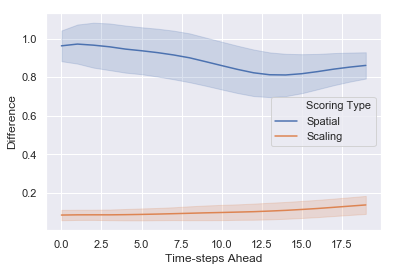

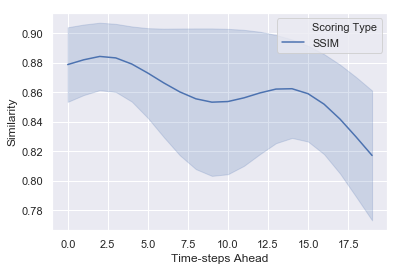

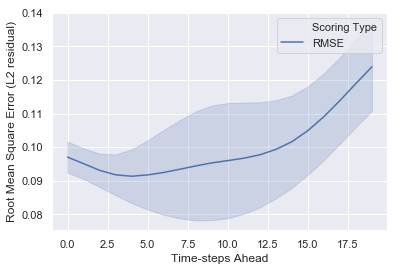

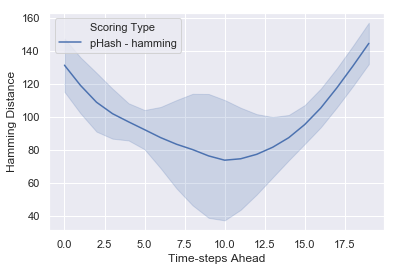

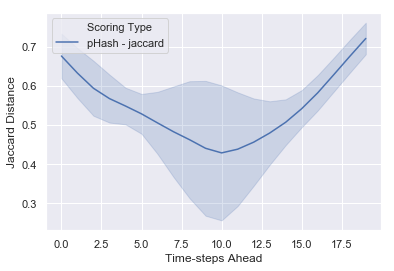

In [252]:
score_keeper.plot(True)

In [250]:
len(dataloader)

82

In [241]:
for batch_index in range(batch_size):
    print(batch_index)

0
1
2
3
4
5


In [211]:
output_frames.size()

torch.Size([6, 20, 128, 128])

In [246]:
output_frames[5, 19, :, :].size()

torch.Size([128, 128])

In [213]:
target_frames.size()

torch.Size([6, 20, 128, 128])

In [215]:
output_frames[batch_index, frame_index, :, :].size()

torch.Size([128, 128])

In [237]:
for batch_index in range(batch_size-1):
    for frame_index in range(num_output_frames-1):
        score_keeper.add(output_frames[batch_index, frame_index, :, :].cpu().numpy(),
                         target_frames[batch_index, frame_index, :, :].cpu().numpy(),
                         frame_index, "pHash", "pHash2", "SSIM", "Own", "RMSE")

In [233]:
out = output_frames[batch_index, frame_index, :, :].cpu()

In [234]:
out.size()

torch.Size([128, 128])

In [235]:
tar = target_frames[batch_index, frame_index:(frame_index+1):, :, :].cpu()

In [236]:
tar.size()

torch.Size([1, 128, 128])